In [1]:
print('Enter the size of encoded data\n')
size = int(input())
print(size)
l = []
print('Enter the binary bits sequence of length ',size,'bits : \n')
for i in range(size):
    l.append(int(input()))
print(l)

Enter the size of encoded data

8
Enter the binary bits sequence of length  8 bits : 

[1, 0, 1, 0, 1, 0, 0, 0]


In [2]:
import matplotlib.pyplot as plt

In [3]:
def plot(l,title,color):
    plt.plot(l, color=color,drawstyle='steps-pre',marker='>')

#### Unipolar Encoding

In [4]:
def unipolar(inp):
    inp1=list(inp)
    inp1.insert(0,0)
    return inp1

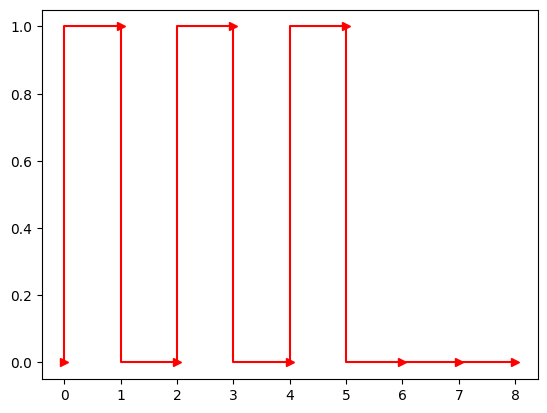

In [5]:
plot(unipolar(l),'Unipolar NRZ','red')

#### Bipolar (AMI)

In [6]:
def AMI(inp):
    inp1=list(inp)
    inp1.insert(0,0)
    lock=False
    for i in range(len(inp1)):
        if inp1[i]==1 and not lock:
            lock=True
            continue
        elif lock and inp1[i]==1:
            inp1[i]=-1
            lock=False
    return inp1  

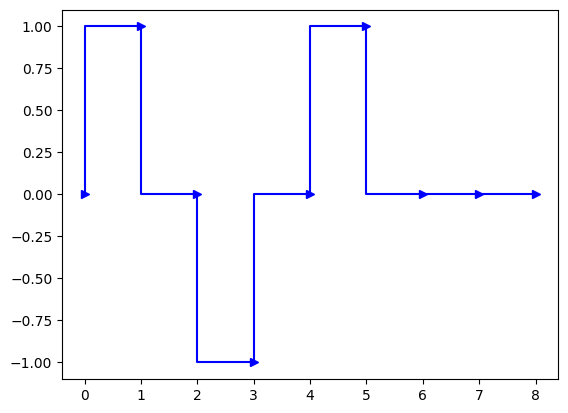

In [7]:
plot(AMI(l),'AMI','blue')

#### Bipolar (Pseudoternary)

In [8]:
def Pseudoternary(inp):
    inp1=list(inp)
    inp1.insert(0,0)
    lock=False
    for i in range(len(inp1)):
        if inp1[i]==0 and not lock:
            lock=True
            continue
        elif lock and inp1[i]==0:
            inp1[i]=-1
            lock=False
    return inp1  

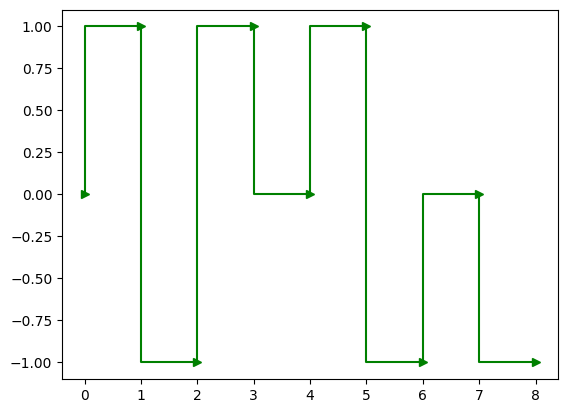

In [9]:
plot(Pseudoternary(l),'Pseudoternary','green')

#### Polar (NRZ-L)

In [10]:
def polar_nrz_l(inp):
    inp1=list(inp)
    inp1.insert(0,0)
    inp1=[-1 if x==0 else 1 for x in inp1]
    return inp1

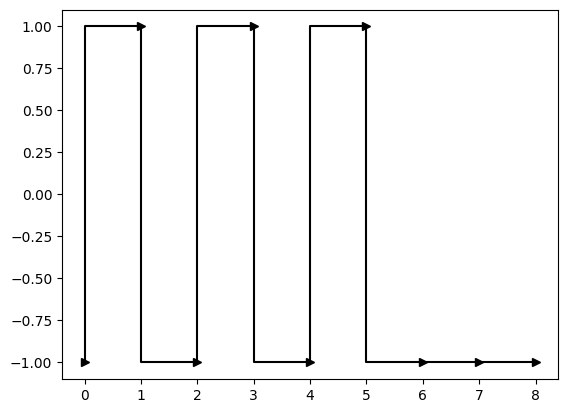

In [11]:
plot(polar_nrz_l(l),'Polar NRZ-L','black')

#### Polar (NRZ-I)

In [12]:
def polar_nrz_i(inp):
    inp2=list(inp)
    lock=False
    for i in range(len(inp2)):
        if inp2[i]==1 and not lock:
            lock=True
            continue
        if lock and inp2[i]==1:
            if inp2[i-1]==0:
                inp2[i]=1
                continue
            else :
                inp2[i]=0
                continue
        if lock:
            inp2[i]=inp2[i-1]
    inp2=[-1 if i==0 else 1 for i in inp2]        
    return inp2

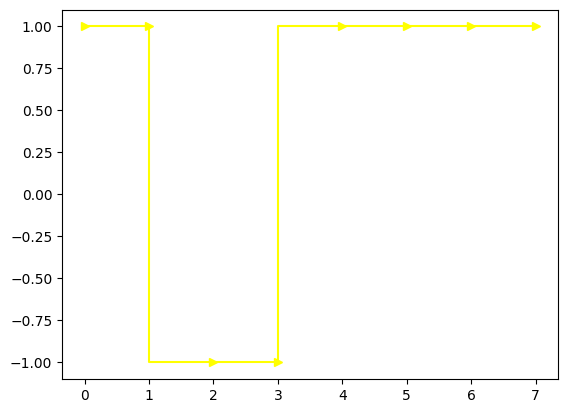

In [13]:
plot(polar_nrz_i(l),'Polar NRZ-I','yellow')

#### Manchester encoding

In [14]:
def Biphase_manchester(inp):
    inp1=list(inp)
    li,init=[],False
    for i in range(len(inp1)):
        if inp1[i]==0:
            li.append(-1)
            if not init:
                li.append(-1)
                init=True
            li.append(1)
        elif inp1[i]==1 :
            li.append(1)
            li.append(-1)
    return li       

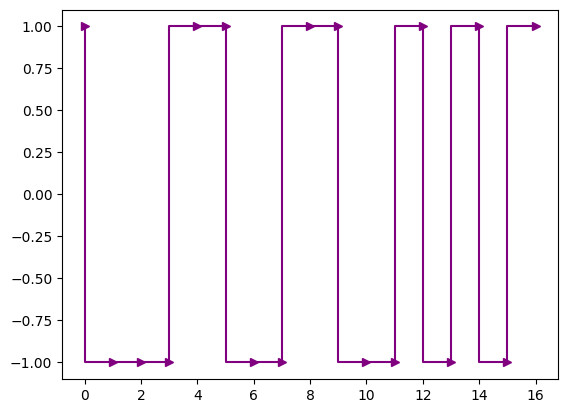

In [15]:
plot(Biphase_manchester(l),'Biphase Manchester','purple')

#### Differential Manchester

In [16]:
def Differential_manchester(inp):
    inp1=list(inp)
    li,lock,pre=[],False,''
    for i in range(len(inp1)):
        if inp1[i]==0 and not lock:
            li.append(-1)
            li.append(-1)
            li.append(1)
            lock=True
            pre='S'
        elif inp1[i]==1 and not lock :
            li.append(1)
            li.append(1)
            li.append(-1)
            lock=True
            pre='Z'
        else:
            if inp1[i]==0:
                if pre=='S':
                    li.append(-1);li.append(1)
                else:
                    li.append(1);li.append(-1)
            else:
                if pre=='Z':
                    pre='S'
                    li.append(-1);li.append(1)
                else:
                    pre='Z'
                    li.append(1);li.append(-1)
                         
    return li                       

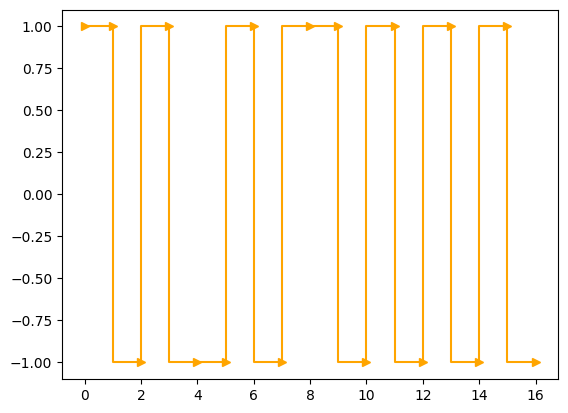

In [17]:
plot(Differential_manchester(l),'Differential Manchester','orange')